In [9]:
import os
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directories):
    """
    Read all of the CSV files in the specified directories.

    Args:
        directories: A comma-separated string of directories that contain the CSV files.

    Returns:
        A list of DataFrames, one for each CSV file.
    """

    dataframes = []
    for directory in directories.split(','):
        csv_files = os.listdir(directory.strip())
        for csv_file in csv_files:
            if csv_file.lower().endswith('.csv'):
                dataframe = pd.read_csv(os.path.join(directory.strip(), csv_file))
                dataframes.append(dataframe)

    return dataframes

def train_rul_model(X_train, y_train):
    """
    Train a Random Forest Regressor model on the given data.

    Args:
        X_train: The feature matrix for training.
        y_train: The target variable vector for training.

    Returns:
        The trained Random Forest Regressor model.
    """

    # Create and train the Random Forest Regressor
    rul_model = RandomForestRegressor(random_state=42)
    rul_model.fit(X_train, y_train)

    return rul_model

def main():
    # Get the list of CSV files in the directory
    directory = "/content/drive/MyDrive/fsm/Learning_set/Bearing2_1,/content/drive/MyDrive/fsm/Learning_set/Bearing2_2"
    csv_files = read_csv_files(directory)

    # Loop over the CSV files and train a model on each one
    for data in csv_files:
        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model and get the trained model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using R-squared score)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

if __name__ == "__main__":
    main()


Index(['8', '26', '5', '8.8441e+05', '-0.399', '0.52'], dtype='object')
R-squared score: -0.00034272634576604233
Index(['8', '55', '55.1', '8.8441e+05', '0.095', '0.651'], dtype='object')
R-squared score: 0.5627001636724378
Index(['8', '30', '15', '8.8441e+05', '-0.363', '0.048'], dtype='object')
R-squared score: -0.029558388339580688
Index(['9', '34', '25', '8.8441e+05', '-0.122', '0.081'], dtype='object')
R-squared score: 0.6180890717088843
Index(['9', '51', '55', '8.8441e+05', '-1.067', '1.492'], dtype='object')
R-squared score: 0.7127009622644982
Index(['10', '9', '45', '8.8441e+05', '0.584', '-1.796'], dtype='object')
R-squared score: 0.6579731719210713
Index(['8', '27', '15', '8.8441e+05', '0.055', '-0.189'], dtype='object')
R-squared score: -0.01913768070048638
Index(['9', '45', '55', '8.8441e+05', '-0.425', '0.772'], dtype='object')
R-squared score: 0.6086191629740141
Index(['9', '41', '35', '8.8441e+05', '-1.221', '1.014'], dtype='object')
R-squared score: 0.6238885550731024
I

Index(['9', '17', '51', '6.1879e+05', '-0.002', '0.249'], dtype='object')
R-squared score: -0.04511797008841034
Index(['9', '33', '51', '6.1879e+05', '-0.218', '-0.759'], dtype='object')
R-squared score: -0.050884607551474614
Index(['9', '50', '21', '6.1879e+05', '0.362', '0.333'], dtype='object')
R-squared score: -0.046289317264160745
Index(['9', '14', '51', '6.1879e+05', '-0.055', '-0.199'], dtype='object')
R-squared score: -0.019059580451884717
Index(['10', '19', '1', '6.1879e+05', '0.031', '0.044'], dtype='object')
R-squared score: -0.20428957537193337
Index(['10', '21', '31', '6.1879e+05', '0.179', '-0.163'], dtype='object')
R-squared score: -0.11219934139059906
Index(['10', '5', '31', '6.1879e+05', '0.399', '0.482'], dtype='object')
R-squared score: -0.2612457390254992
Index(['10', '4', '51', '6.1879e+05', '-0.066', '0.182'], dtype='object')
R-squared score: -0.22984550250104863
Index(['9', '2', '31', '6.1879e+05', '-0.486', '-0.425'], dtype='object')
R-squared score: 0.006764546

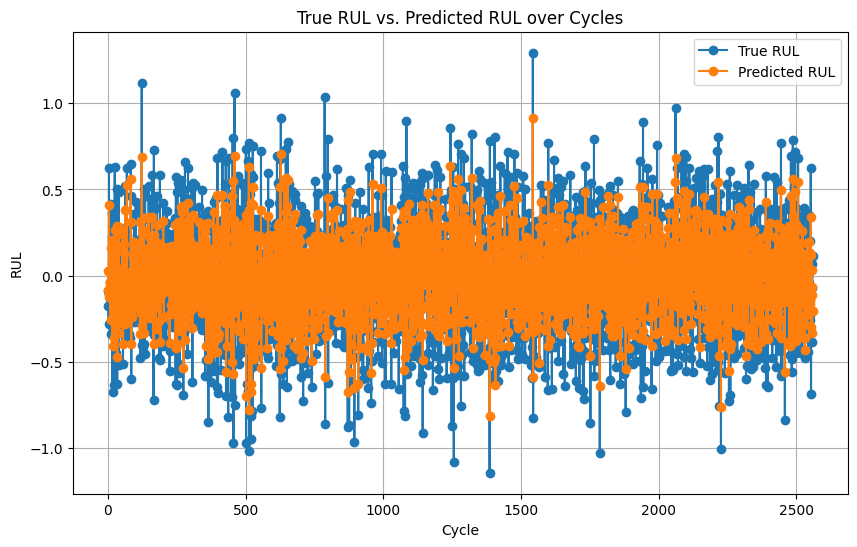

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def read_csv_files(directory):
    """
    Read all of the CSV files in the specified directory.

    Args:
        directory: The directory that contains the CSV files.

    Returns:
        A list of DataFrames, one for each CSV file.
    """

    csv_files = os.listdir(directory)
    dataframes = []
    for csv_file in csv_files:
        dataframe = pd.read_csv(os.path.join(directory, csv_file))
        dataframes.append(dataframe)

    return dataframes
def plot_rul_prediction(data):
    """
    Plot the RUL predictions against the true RUL values over cycles.

    Args:
        data: DataFrame containing the predicted and true RUL values.
    """

    plt.figure(figsize=(10, 6))

    # Create a new column 'Cycle' representing the cycle number for each row
    data['Cycle'] = range(1, len(data) + 1)

    # Plot True RUL and Predicted RUL over cycles
    plt.plot(data['Cycle'], data['True RUL'], label='True RUL', marker='o')
    plt.plot(data['Cycle'], data['Predicted RUL'], label='Predicted RUL', marker='o')

    plt.xlabel('Cycle')
    plt.ylabel('RUL')
    plt.title('True RUL vs. Predicted RUL over Cycles')
    plt.legend()
    plt.grid(True)
    plt.show()


def train_main():
    # Get the list of CSV files in the directory
    directory = "/content/drive/MyDrive/fsm/Test_set/Bearing2_6"
    csv_files = read_csv_files(directory)

    # Loop over the CSV files and train a model on each one
    for csv_file in csv_files:
        data = csv_file

        # Print column names to find the correct name of the target variable (RUL) column
        print(data.columns)

        # Assume the target variable is in the last column (index -1)
        target_column_index = -1
        X = data.drop(data.columns[target_column_index], axis=1)
        y = data[data.columns[target_column_index]]

        # Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
        imputer = SimpleImputer(strategy='mean')

        # Fit the imputer on the data and transform
        X_imputed = imputer.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train the RUL prediction model
        rul_model = train_rul_model(X_train, y_train)

        # Evaluate the model's performance on the test set (e.g., using mean squared error)
        score = rul_model.score(X_test, y_test)
        print("R-squared score:", score)

        # Add the predicted RUL values to the DataFrame
        data['Predicted RUL'] = rul_model.predict(X_imputed)
        data['True RUL'] = y

    return data

if __name__ == "__main__":
    data = train_main()
    plot_rul_prediction(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(data.columns)


In [ ]:
print(data.head(20))
